#Classificação com a Rede Neural Convolucional


##Carregando Bibliotecas

Lista de Bibliotecas utilizadas:
 

*   **Pandas** - Permite trabalhar com Dataframe, utilizada para carregar os dados;
*   **Numpy** - Permite trabalhar com algumas operações matemática e com arrays;
*   **Matplotlib** - Permite gerar gráficos;
*   **Sklearn (Scikit-learn)** - Biblioteca que permite trabalhar com alguns algoritmos de aprendizado de máquina além de métricas, tais como acurácia e matriz de confusão;
*   **Keras** - Biblioteca específica para trabalhar com Deep Learning em python, utiliza por trás o Tensorflow;

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist, fashion_mnist, cifar10 #Carrega as Bases de dados direto do Keras
from keras.models import Model #Classe que permite criar o objeto que vai representar a Rede Neural
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten #Classe que permite criar as camadas da rede neural
from keras.optimizers import SGD #Classe que permite trabalhar com o Otmizador alterando seus hiperparâmetros
from keras.utils import to_categorical #Função que permite transformar as saídas de 0, 1, 2 para [0,0,0], [0,1,0], [0,0,1]

from sklearn.metrics import accuracy_score #Funções para calcular a acurácia do modelo

##Carregamendo dos Dados

Os dados são carregados diretamente do Keras, pela função **load_data** nas variáveis  **X_train**, tendo **y_train** como saídas, e **X_test**, tendo **y_test** como saídas.

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255
X_test = X_test / 255

170500096/170498071 [==============================] - 4s 0us/step


Visuzalização das 10 primeiras imagens que compõe a base de treinamento

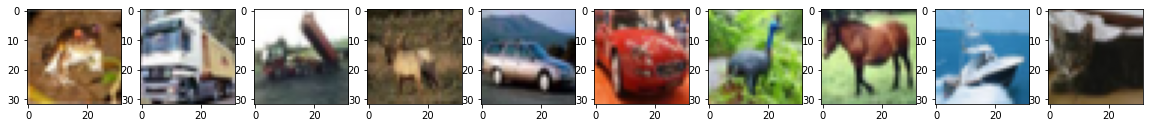

In [ ]:
plt.rcParams['figure.figsize'] = (20,10)
fig, ax = plt.subplots(1,10)
plt.gray()
for i in np.arange(10):
    ax[i].imshow(X_train[i,:])
plt.show()

##Criação do Modelo de Rede Neural

In [ ]:
camada_entrada = Input(shape=(32,32,3))

conv1 = Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same')(camada_entrada)
pooling1 = MaxPooling2D(pool_size=(3,3))(conv1)

conv2 = Conv2D(filters=16, kernel_size=(5,5), activation='relu', padding='same')(pooling1)
pooling2 = MaxPooling2D(pool_size=(2,2))(conv2)

flatten = Flatten()(pooling2)

camada1 = Dense(units=128, activation='relu')(flatten)
camada_saida = Dense(units=10, activation='softmax')(camada1)

cnn = Model(camada_entrada, camada_saida)
cnn.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()
relatorio = cnn.fit(X_train, to_categorical(y_train), batch_size=512, epochs=30, 
        shuffle=True,
        validation_data=(X_test, to_categorical(y_test)))


Model: "functional_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 16)        12816     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)             

##Avaliação do Modelo

Visualização da evolução da acurácia da rede neural durante o treinamento. Sendo a linha azul o erro com a base de treino e a linha laranja o erro com a base de teste. Permitindo verificar que não está ocorrendo overfitting, pois tanto treino quanto teste evoluem de forma bem similar.

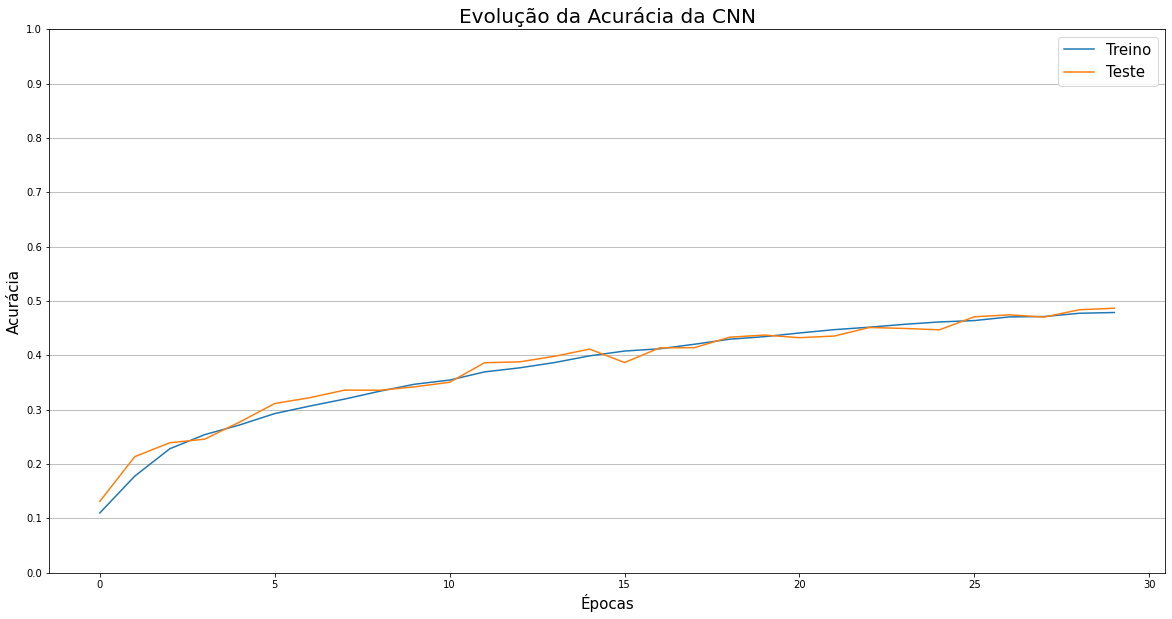

In [ ]:
plt.plot(relatorio.epoch, relatorio.history['accuracy'], label='Treino')
plt.plot(relatorio.epoch, relatorio.history['val_accuracy'], label='Teste')
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Evolução da Acurácia da CNN', fontsize=20)
plt.xlabel('Épocas', fontsize=15)
plt.ylabel('Acurácia', fontsize=15)
plt.legend(fontsize=15)
plt.grid(axis='y')
plt.show()

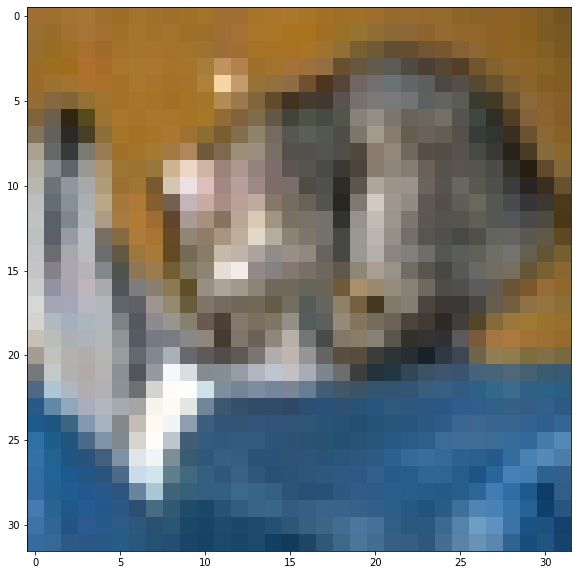

In [ ]:
plt.imshow(X_test[0,:])
plt.gray()

Visualização do resultada da imagem de entrada após a primeira camada de convolução.

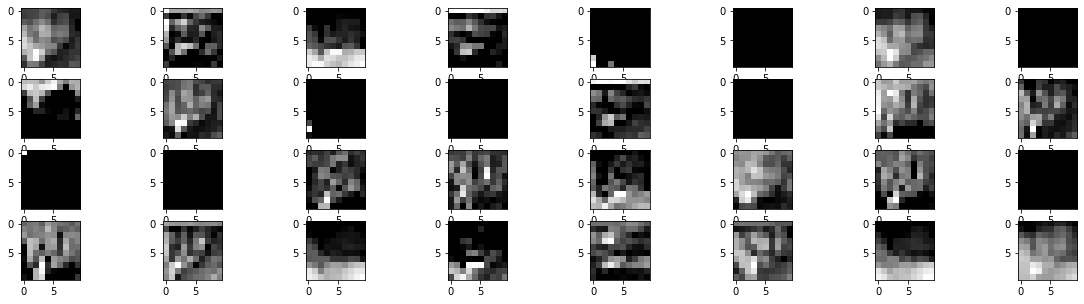

In [ ]:
convolucao1 = Model(camada_entrada, pooling1)
X_filtros1 = convolucao1.predict(X_test)
X_amostra = X_filtros1[0,:]

plt.rcParams['figure.figsize'] = (20,5)
fig, ax = plt.subplots(4,8)
im = 0
for i in np.arange(4):
    for j in np.arange(8):
        img = X_amostra[:, :, im]
        ax[i,j].imshow(img)
        im += 1

Visualização do resultada da imagem de entrada após a segunda camada de convolução.

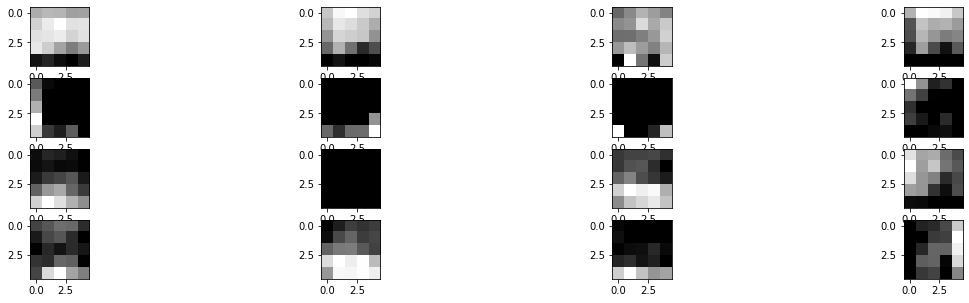

In [ ]:
convolucao2 = Model(camada_entrada, pooling2)
X_filtros2 = convolucao2.predict(X_test)
X_amostra = X_filtros2[0,:]
plt.rcParams['figure.figsize'] = (20,5)
fig, ax = plt.subplots(4,4)
im = 0
for i in np.arange(4):
    for j in np.arange(4):
        img = X_amostra[:, :, im]
        ax[i,j].imshow(img)
        im += 1